# Microsoft Movie Project 

## Business Problem

Microsoft Studios wants to start the production of films. In order to do so they reached out to me and they asked me to give them some recommendations so that they can be successful in doing so. They want to keep their shareholders happy and they want to convince them that investing in the production of films will be a great investment. By analyzing the data I will have a better understanding on how to better mold and finalize the recommendations that I will be providng to Microsoft Studios.

## Data Understanding 

Movies have been around for a very long time. The data bases that I will be working with include movies that have been released in the 1900's up to the 2000's. In addition to the movie title, other information about the film such as the release date, popularity of the movie, etc. are also included. 

# Importing Data 

In [1]:
import pandas as pd 
import sqlite3
from matplotlib import pyplot as plt
import numpy as np 
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [2]:
!ls zippedData/

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tmdb.movies.csv.gz
im.db                   rt.reviews.tsv.gz       tn.movie_budgets.csv.gz


## Movie Gross 

In [3]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [4]:
bom.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Movies

In [5]:
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [6]:
movies.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Movie Budgets 

In [7]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [8]:
movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Questions

- What studio had the greatest total gross earnings? 
- What type of relationship is there between production budget and total gross earnings?
- What month of release date had the greatest gross earnings? 

## Q1: What studio had the greatest total gross earnings

In [9]:
len(bom)

3387

In [10]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
'''
This line of code was used to fill in null values under the domestic_gross columns with 0. 
'''
domestic_gross = bom.loc[:,"domestic_gross"].fillna(0)
print(domestic_gross)

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64


Filling null values with 0 is resonable to assume that they did not have any gross earnings. 

In [15]:
'''
This line of code was used to take out commas, fill null values with 0, and convert the dtype to a float. 
'''
foreign_gross = bom.loc[:,"foreign_gross"].str.replace(",","").astype(float).fillna(0)

In [16]:
print(foreign_gross)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            0.0
3383            0.0
3384            0.0
3385            0.0
3386            0.0
Name: foreign_gross, Length: 3387, dtype: float64


In [17]:
bom['total_gross'] = foreign_gross + domestic_gross 

In [18]:
bom

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,NaN,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,NaN,2018,2.400000e+03


In [19]:
'''
Line of code to create a new column where total_gross is now displayed in millions rounded to the second
decimal place which is easier to read than total_gross in scientific method

'''
bom['total_gross_in_millions'] = bom['total_gross'].div(1000000).round(2)

In [20]:
bom

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross_in_millions
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09,1067.00
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09,1025.50
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08,960.30
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08,828.30
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08,752.60
...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,6.200000e+03,0.01
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,4.800000e+03,0.00
3384,El Pacto,Sony,2500.0,NaN,2018,2.500000e+03,0.00
3385,The Swan,Synergetic,2400.0,NaN,2018,2.400000e+03,0.00


In [21]:
studios = bom.groupby('studio')['total_gross_in_millions'].agg(['mean','count']).reset_index()

In [22]:
studios

,studio,mean,count
0,3D,16.000000,1
1,A23,0.080000,2
2,A24,11.482857,49
3,ADC,0.125000,2
4,AF,0.941667,6
...,...,...,...
252,XL,0.230000,2
253,YFG,1.100000,1
254,Yash,21.746429,14
255,Zee,1.670000,1


In [23]:
studios_clean = studios.loc[studios['count']>3].sort_values('mean', ascending = False)

In [24]:
studios_clean_ten = studios_clean.head(10)

In [25]:
'''
Lines of code to rename the studios under the Studio's column
source:https://www.geeksforgeeks.org/add-a-new-column-in-pandas-data-frame-using-a-dictionary/
'''

#data_frame = pd.DataFrame([[i] for i in range(7)], columns =['data'])
  
# Introducing weeks as dictionary
studios_dict = {'P/DW':'Pixar / Dreamworks', 'BV':'Buena Vista', 'WB (NL)':'New Line Cinema', 'Fox':'Fox', 
'WB':'Warner Bros.','Sony':'Sony', 'Uni.':'Universal', 'Par.':'Paramount','Sum.':'Summit Entertainment', 'LG/S':'Lifes Good / Sony'}
  
# Mapping the dictionary keys to the data frame.
studios_clean_ten['studio'] = studios_clean_ten['studio'].map(studios_dict)


<ipython-input-25-2da4662a7a5c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studios_clean_ten['studio'] = studios_clean_ten['studio'].map(studios_dict)


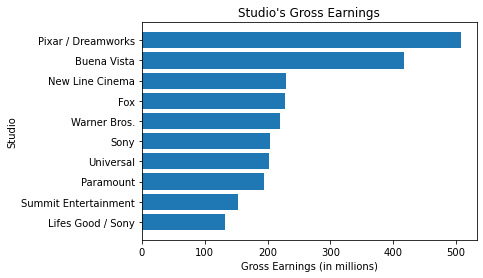

In [26]:
'''
These lines of code plot the top 20 studios with the greatest
gross earnings and that produced at least 3 films. 
'''

fig, ax = plt.subplots()
ax.barh(y= studios_clean_ten['studio'], width = studios_clean_ten['mean'] )
ax.set_title("Studio's Gross Earnings")
ax.set_xlabel("Gross Earnings (in millions)")
ax.set_ylabel("Studio")
ax.invert_yaxis()
#plt.show()
plt.savefig('Images/studios_gross_earnings.png', bbox_inches = 'tight')

## Q2: What type of relationship is there between production budget and total gross earnings?

In [27]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [28]:
movie_budgets.loc[:,"domestic_gross"]

0       $760,507,625
1       $241,063,875
2        $42,762,350
3       $459,005,868
4       $620,181,382
            ...     
5777              $0
5778         $48,482
5779          $1,338
5780              $0
5781        $181,041
Name: domestic_gross, Length: 5782, dtype: object

In [29]:
domestic_gross_clean = movie_budgets.loc[:,"domestic_gross"].str.replace(",","").str.replace("$","").astype(float).fillna(0)

In [30]:
movie_budgets.loc[:,"worldwide_gross"]

0       $2,776,345,279
1       $1,045,663,875
2         $149,762,350
3       $1,403,013,963
4       $1,316,721,747
             ...      
5777                $0
5778          $240,495
5779            $1,338
5780                $0
5781          $181,041
Name: worldwide_gross, Length: 5782, dtype: object

In [31]:
worldwide_gross_clean = movie_budgets.loc[:,"worldwide_gross"].str.replace(",","").str.replace("$","").astype(float).fillna(0)

In [32]:
movie_budgets['total_gross'] = domestic_gross_clean + worldwide_gross_clean

In [33]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1.936903e+09


In [34]:
movie_budgets['total_gross_in_millions'] = movie_budgets['total_gross'].div(1000000).round(2)

In [35]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_gross_in_millions
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3.536853e+09,3536.85
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.286728e+09,1286.73
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1.925247e+08,192.52
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.862020e+09,1862.02
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1.936903e+09,1936.90


In [36]:
production_budget_clean = movie_budgets["production_budget"].str.replace(",","").str.replace("$","").astype(float)

In [37]:
movie_budgets['production_budget_clean'] = production_budget_clean

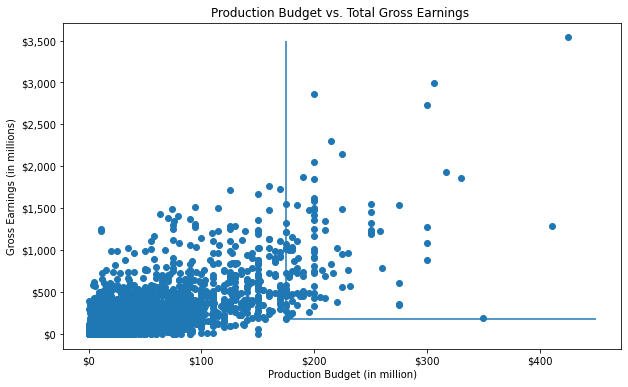

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y= movie_budgets['total_gross']/1000000, 
           x = movie_budgets['production_budget_clean']/1000000)
ax.set_title("Production Budget vs. Total Gross Earnings ")
ax.set_xlabel("Production Budget (in million)")
ax.set_ylabel("Gross Earnings (in millions)")
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.set_xlim([0,3500000000])
#plt.show()
ax.vlines(175, 175,3500)
ax.hlines(175, 175,450)

plt.savefig('Images/production_budget_vs_total_gross_earnings.png', bbox_inches = 'tight')

In [39]:
high_budget_gross = movie_budgets.loc[(movie_budgets['production_budget_clean']>175000000)
                  &(movie_budgets['total_gross']>175000000)]

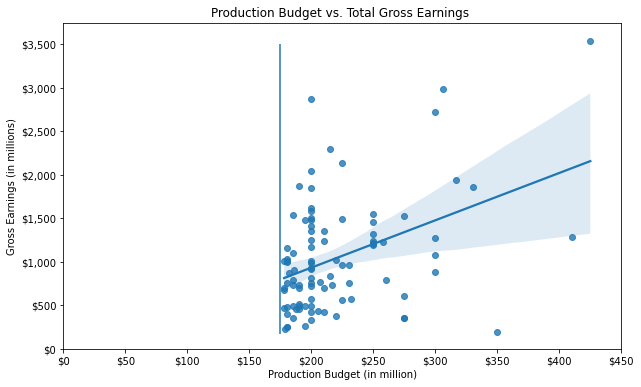

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(y= high_budget_gross['total_gross']/1000000, 
           x = high_budget_gross['production_budget_clean']/1000000, ax=ax)
ax.set_title("Production Budget vs. Total Gross Earnings ")
ax.set_xlabel("Production Budget (in million)")
ax.set_ylabel("Gross Earnings (in millions)")
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_xlim([0,450])
ax.set_ylim([0,3750])
ax.vlines(175, 175,3500)

plt.savefig('Images/production_budget_vs_total_gross_earnings_zoom.png', bbox_inches = 'tight')

## Q3: What month of release date had the greatest gross earnings?

In [41]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_gross_in_millions,production_budget_clean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3.536853e+09,3536.85,425000000.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.286728e+09,1286.73,410600000.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1.925247e+08,192.52,350000000.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.862020e+09,1862.02,330600000.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1.936903e+09,1936.90,317000000.0


In [42]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [43]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_gross_in_millions,production_budget_clean
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3.536853e+09,3536.85,425000000.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.286728e+09,1286.73,410600000.0
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1.925247e+08,192.52,350000000.0
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.862020e+09,1862.02,330600000.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1.936903e+09,1936.90,317000000.0


In [47]:
movie_budgets['year'] = movie_budgets['release_date'].dt.year

In [45]:
movies.duplicated(['title','year']).sum()

KeyError: Index(['year'], dtype='object')

In [46]:
movies_clean = movies.sort_values(by="popularity", ascending=False).drop_duplicates(['title','year'])

KeyError: Index(['year'], dtype='object')

In [48]:
len(movies_clean)

NameError: name 'movies_clean' is not defined

In [49]:
movie_budgets.duplicated(['movie','year']).sum()

1

In [50]:
def movie_budgets_clean(x):
    '''
    A function to clean up money columns
    This removes '$' and ',', and turns the string into a float
    It is designed to be used with .apply on each column
    
    Input: x (string cell in a dataframe)
    Output: float version of x
    '''
    return float(x.replace("$", "").replace(",",""))

In [51]:
for column in['production_budget','domestic_gross','worldwide_gross']:
    movie_budgets[column] = movie_budgets[column].apply(movie_budgets_clean)

In [52]:
movie_budgets['month'] = movie_budgets['release_date'].dt.month

In [53]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_gross_in_millions,production_budget_clean,year,month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3536.85,425000000.0,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,1286.73,410600000.0,2011,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,192.52,350000000.0,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1862.02,330600000.0,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1936.90,317000000.0,2017,12
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,0.00,7000.0,2018,12
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.889770e+05,0.29,6000.0,1999,4
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03,0.00,5000.0,2005,7
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,0.00,1400.0,2015,9


In [54]:
budget_months = movie_budgets.groupby('month')['total_gross_in_millions'].agg(['mean','count']).reset_index()

In [55]:
budget_months

,month,mean,count
0,1,70.513429,347
1,2,106.959107,392
2,3,119.206426,470
3,4,87.248656,454
4,5,228.965749,407
5,6,208.350898,479
6,7,201.691750,440
7,8,93.146613,496
8,9,69.843408,493
9,10,73.888133,573


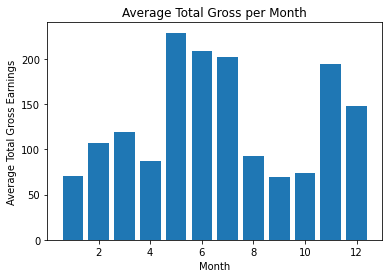

In [56]:
fig, ax = plt.subplots()
ax.bar(budget_months['month'],budget_months['mean'])
ax.set_title("Average Total Gross per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Average Total Gross Earnings")

plt.show()

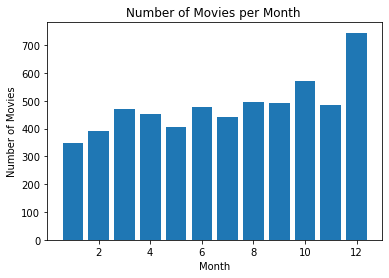

In [57]:
fig, ax = plt.subplots()
ax.bar(budget_months['month'],budget_months['count'])
ax.set_title("Number of Movies per Month ")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Movies")

plt.show()

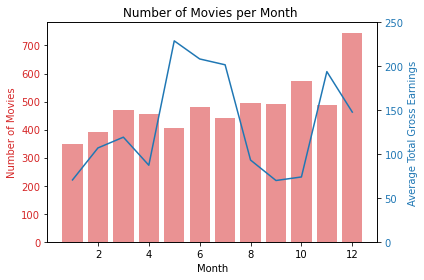

In [58]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.bar(budget_months['month'],budget_months['count'], color=color, alpha=.5)
ax1.set_title("Number of Movies per Month ")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Movies", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(budget_months['month'],budget_months['mean'], color=color)
ax2.set_ylabel("Average Total Gross Earnings", color=color)
 # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,250])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()
plt.savefig('Images/number_of_movies_per_month.png', bbox_inches = 'tight')

In [59]:
len(movies)

26517

In [60]:
len(movie_budgets)

5782

In [61]:
len(bom)

3387

## Exploratory Data Analysis 

1. What studio had the greatest total gross earnings?

- Dreamworks / Pixar and Buena Vista had the greatest total gross earnings.

2. What type of relationship is there between production budget and total gross earnings?

- The data showed that if you have a production budget of at least $150 million then you are placed on a spot in where you are less likely to break even. 

3. What month of release date had the greatest gross earnings?

- Releasing movies during the summer time showed that that was the time in which total gross earning was the highest. 

## Conclusions / Recommendations

This analysis leads to three recommendations for increasing Microsoft's gross earnings :

1. Releasing films in the summertime would be beneficial for Microsoft Studios. According to the line/bar graph (Production Budget vs. Gross Earnings) that was constructed, there was a clear peak in gross earnings without the need to produce various films. 
2. Based on the bar graph (Amount of Films Produced by Studios) Pixar/ Dreamworks & Buena Vista Studios notably were the top two studios with the greatest amount of gross earnings. Partnering up with these studios would be a smart move in order to increase our profits at Microsoft Studios.
3. Having a production budget of at least $150 million sets the company in a "sweet spot" per say, in where they would be at a much lower risk of breaking even and instead generate revenue. 

## Next Steps 

Further analyses could yield additional insights to further increase Microsoft's gross earnings:

1. If I would have had more time to analyze the data, I would dig deeper and find what correlation there is between the genre of the movie and the amount of revenue that it generated. 
2. Additionally, I would also take a closer look at how the movie directors contribute to the success of the movies being produced. 
3. Lastly, I would try to narrow down the metrics that I used so that it instead of taking into account the movies released in the early 1900's to early 2000's, I would only be focusing on those released during the 2000's.